In [17]:
from cluster import cluster
from kmeans import kmeans

In [18]:
km = kmeans(k=4, balanced=False)
km

In [19]:
from sklearn.datasets import make_blobs

X, cluster_assignments = make_blobs(n_samples=800, centers=4, cluster_std=0.60, random_state=0)
test_cluster_assignments, centers, cluster_counts = km.fit(X)
cluster_counts

array([200, 102, 395, 103])

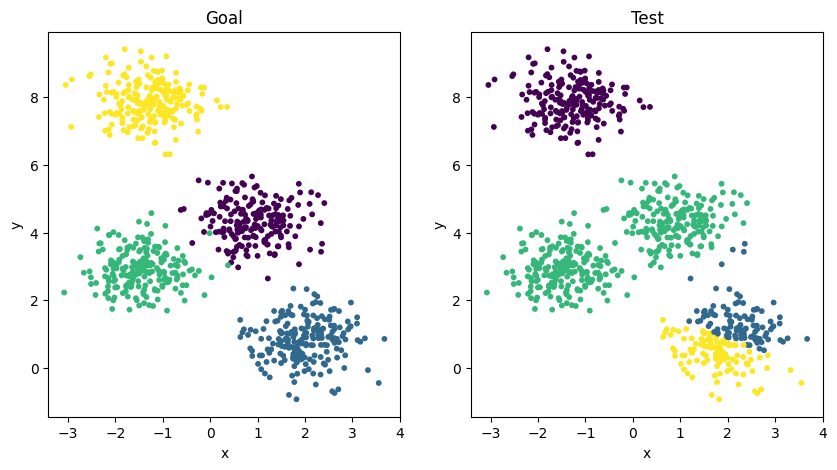

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=cluster_assignments, s=10, cmap='viridis')
axs[0].set_title('Goal')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].scatter(X[:, 0], X[:, 1], c=test_cluster_assignments, s=10, cmap='viridis')
axs[1].set_title('Test')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.show()